# NB Setup

In [658]:
import os
import requests
import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import mplfinance as mpf

data_folder = "nb_matplotlib_data"
data_path = os.path.join(os.getcwd(), data_folder)

file_paths_and_url = {
    "icecreamsales.csv": "https://raw.githubusercontent.com/sebastianpacurar/ai-ds-projects/refs/heads/data_sets/data_sets/icecreamsales.csv",
    "GOOG_stock_data.csv": "https://raw.githubusercontent.com/sebastianpacurar/ai-ds-projects/refs/heads/data_sets/data_sets/GOOG_stock_data.csv"
}

def path_to(f_path):
    return os.path.join(data_path, f_path)

# create root folder for this notebook's data sets
def create_data_sets_folder():
    if not os.path.exists(data_path):
        os.makedirs(data_path)
        print(f"Folder {data_path} created in {os.getcwd()}")
    else:
        print(f"Folder {data_path} already exists in {os.getcwd()}")

# download data set files from github repos, and store them in data_path
def download_raw_git_files():
    for f_name, f_url in file_paths_and_url.items():
        f_path = os.path.join(data_path, f_name)
        if not os.path.exists(f_path):
            res = requests.get(f_url)
            with open(f_path, "wb") as file:
                file.write(res.content)
            print(f"File \"{f_name}\" downloaded in {data_path}")
        else:
            print(f"Skip File \"{f_name}\"; already exists in {data_path}")

def load_csv_data_set(f_path):
    try:
        df = pd.read_csv(path_to(f_path))
        print(f'Loaded "{f_path}" to Dataframe')
        return df
    except:
        print(f'Something went wrong with loading the "{f_path}"')

# download data sets if they don't exist
create_data_sets_folder()
download_raw_git_files()

# load data sets into data frames for sample use
ice_cream_sales = load_csv_data_set("icecreamsales.csv")
stocks_data = load_csv_data_set("GOOG_stock_data.csv")

Folder C:\Users\pacur\Documents\git\ai-ds-projects\study_materials\matplotlib\nb_matplotlib_data already exists in C:\Users\pacur\Documents\git\ai-ds-projects\study_materials\matplotlib
Skip File "icecreamsales.csv"; already exists in C:\Users\pacur\Documents\git\ai-ds-projects\study_materials\matplotlib\nb_matplotlib_data
Skip File "GOOG_stock_data.csv"; already exists in C:\Users\pacur\Documents\git\ai-ds-projects\study_materials\matplotlib\nb_matplotlib_data
Loaded "icecreamsales.csv" to Dataframe
Loaded "GOOG_stock_data.csv" to Dataframe


<br><hr><hr><br>

# 1) Basics

<br><hr><br>

## 1.1 Ways to plot

<table>
    <tbody>
        <tr>
            <th>Method</th>
            <th>Best For</th>
            <th>Flexibility</th>
            <th>Layout Control</th>
            <th>Customization Ease</th>
        </tr>
        <tr>
            <td>plt.plot()</td>
            <td>Single plots</td>
            <td>Low</td>
            <td>None</td>
            <td>Simple</td>
        </tr>
        <tr>
            <td>plt.subplot()</td>
            <td>Small multiple plots</td>
            <td>Low</td>
            <td>Basic</td>
            <td>Medium</td>
        </tr>
        <tr>
            <td>plt.subplots()</td>
            <td>Multiple structured plots</td>
            <td>High</td>
            <td>Easy</td>
            <td>High</td>
        </tr>
        <tr>
            <td>plt.figure().add_subplot()</td>
            <td>Dynamically adding subplots</td>
            <td>High</td>
            <td>Good</td>
            <td>High</td>
        </tr>
        <tr>
            <td>gridspec</td>
            <td>Complex layouts</td>
            <td>Very High</td>
            <td>Best</td>
            <td>Very High</td>
        </tr>
        <tr>
            <td>subplot2grid()</td>
            <td>Grid-based flexible layouts</td>
            <td>Medium</td>
            <td>Good</td>
            <td>Medium</td>
        </tr>
    </tbody>
</table>


<br><hr><br>

### 1.1.2 - plot()
* Basic single plot
* Limited customization:
    * Uses a stateful approach, so modifications must be made globally
* Customization:
    * Add labels using `plt.xlabel()` and `plt.ylabel()`
    * Change line styles using `plt.plot(x, y, "r--")`
    * Add legends using `plt.legends()`

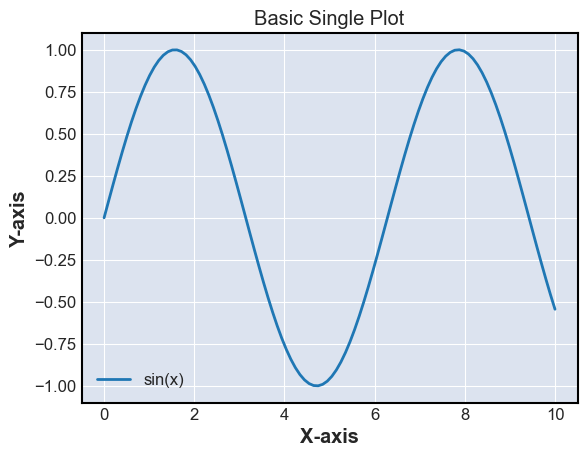

In [665]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, label="sin(x)")
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Basic Single Plot")
plt.show()

<br><hr><br>

### 1.1.3 - subplot()
* Multiple subplots
* Good for small multiple plots, allowing plotting multiple graphs in a single figure
* Less flexible than `subplots()` - harder to scale for more complex layouts
* Customization:
    * Specify subplot layout by using `plt.subplot(rows, cols, index)`
    * Adjust spacing using `plt.tight_layout()`
    * Add individual titles with `plt.title()`


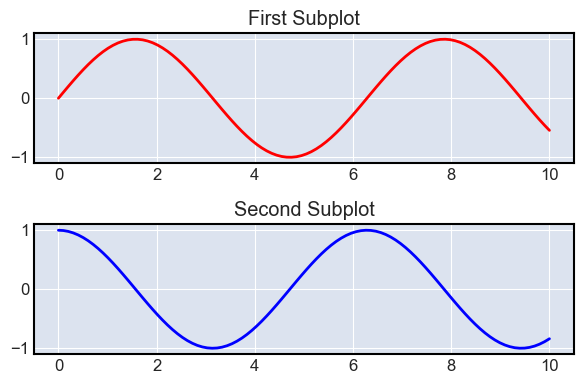

In [668]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(6, 4))

plt.subplot(2, 1, 1)
plt.plot(x, y, "r")
plt.title("First Subplot")

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x), "b")
plt.title("Second Subplot")

plt.tight_layout()
plt.show()

<br><hr><br>

### 1.1.4 - subplots()
* Recommended for multiple plots - uses anobject-oriented approach
* Customization:
    * Iterate through `axes` array to modify subplots easily
    * Set properties for individual subplots: `axes[i].set_title()`, `axes[i].grid(True)`

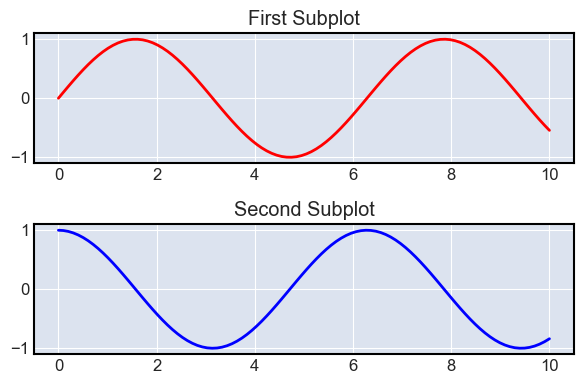

In [671]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, axes = plt.subplots(2, 1, figsize=(6, 4))
axes[0].plot(x, y, "r")
axes[0].set_title("First Subplot")

axes[1].plot(x, np.cos(x), "b")
axes[1].set_title("Second Subplot")

plt.tight_layout()
plt.show()

<br><hr><br>

### 1.1.5 - fig.add_subplot()

* Flexible layout:
    * Allows adding subplots dynamically
* More code required compared to `plt.subplots()`
* Customization:
    * Set axis limit: `ax.set_xlim()`, `ax.set_ylim()`
    * Modify subplot position manually, using `fig.add_subplot(nrows, ncols, index)`

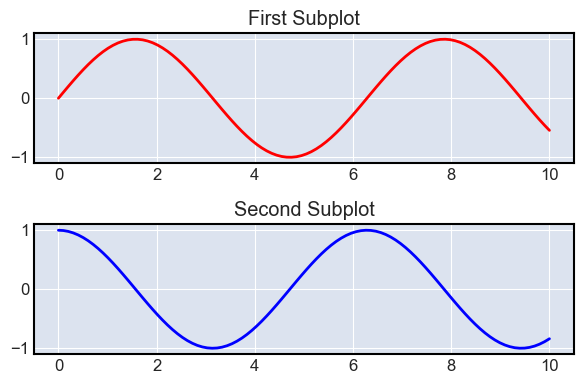

In [674]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(x, y, "r")
ax1.set_title("First Subplot")

ax2.plot(x, np.cos(x), "b")
ax2.set_title("Second Subplot")

plt.tight_layout()
plt.show()

<br><hr><br>

### 1.1.6 - gridspec.GridSpec()
* Powerful for Complex Layouts:
    * Allows fine-grained control over subplot sizes
* Better than `plt.subplot()` for Unequal Sizes:
    * Can merge multiple cells into one subplot
* Customization
    * Set `width_ratios` and `height_ratios` for precise control
    * Manually assign subplot positions, using `gs[row, col]`

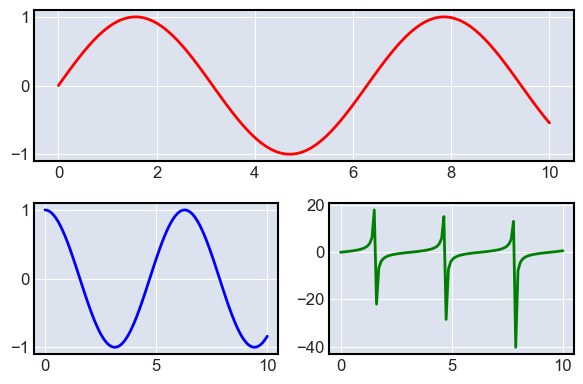

In [677]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig = plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, :])  # top plot spanning both columns
ax2 = fig.add_subplot(gs[1, 0])  # bottom left plot
ax3 = fig.add_subplot(gs[1, 1])  # bottom right plot

ax1.plot(x, y, "r")
ax2.plot(x, np.cos(x), "b")
ax3.plot(x, np.tan(x), "g")

plt.tight_layout()
plt.show()

<br><hr><br>

### 1.1.7 - subplot2grid()
* Alternative to `gridspec` for simplicity:
    * Easier to use than gridspec, but not as flexible
* Less control over ratios:
    * Unlike gridspec, no weight-based resizing
* Customization:
    * Define subplot positions using `(shape, location, colspan, rowspan)`
    * Great for combining large and small subplots in one figure


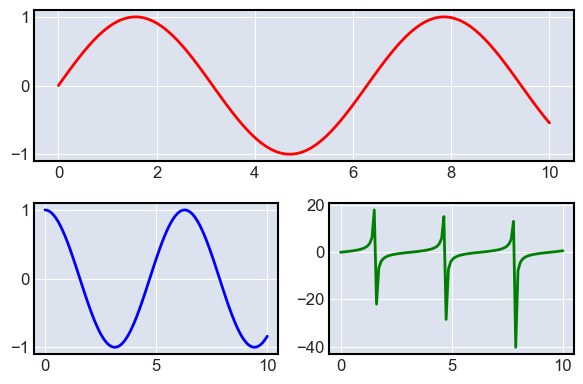

In [680]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (1, 1))

ax1.plot(x, y, "r")
ax2.plot(x, np.cos(x), "b")
ax3.plot(x, np.tan(x), "g")

plt.tight_layout()
plt.show()

<br><hr><br>

## 1.2 - Figure Objects

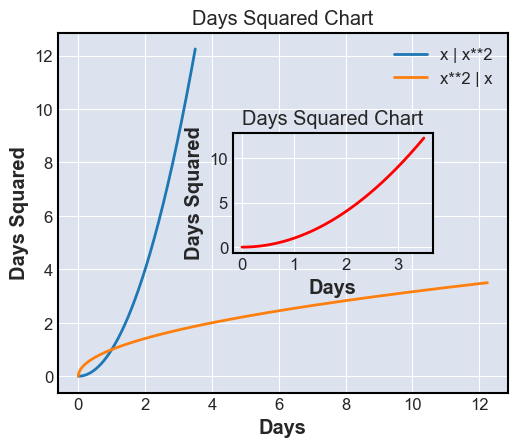

In [683]:
x = np.linspace(0, 3.5, 1000)
y = x**2

# using Figure Objects
fig = plt.figure(figsize=(5 ,4), dpi=100)
axes_1 = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes_1.set_xlabel("Days")
axes_1.set_ylabel("Days Squared")
axes_1.set_title("Days Squared Chart")
axes_1.plot(x,y,label="x | x**2")
axes_1.plot(y,x,label="x**2 | x")
axes_1.legend(loc=0)

# inner plot
axes_2 = fig.add_axes([0.45, 0.45, 0.4, 0.3])
axes_2.set_xlabel("Days")
axes_2.set_ylabel("Days Squared")
axes_2.set_title("Days Squared Chart")
axes_2.plot(x,y, "r")

# add random text at 0, 40 pixels

<br><hr><br>

## 1.3 - Appearance Options

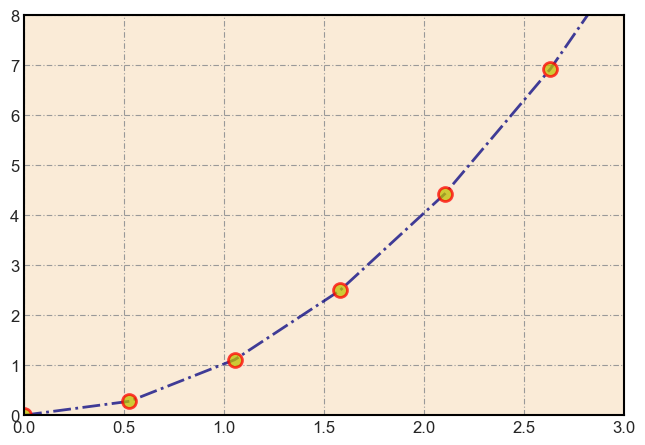

In [686]:
x = np.linspace(0, 10, 20)
y = x**2

fig_3 = plt.figure(figsize=(6,4))
axes_3 = fig_3.add_axes([0,0,1,1])
axes_3.plot(x, y, color="navy", alpha=.75, lw=2, ls="-.", marker="o", markersize=10,
           markerfacecolor="y", markeredgecolor="r", markeredgewidth=2)

# how to zoom:
axes_3.set_xlim([0, 3])
axes_3.set_ylim([0, 8])

# add grid in the background
axes_3.grid(True, color="0.6", dashes=(5,2,1, 2))

# change the background color for our grid pattern
axes_3.set_facecolor("#FAEBD7")
plt.show()

<br><hr><br>

## 1.4 - Vertical and Horizontal lines

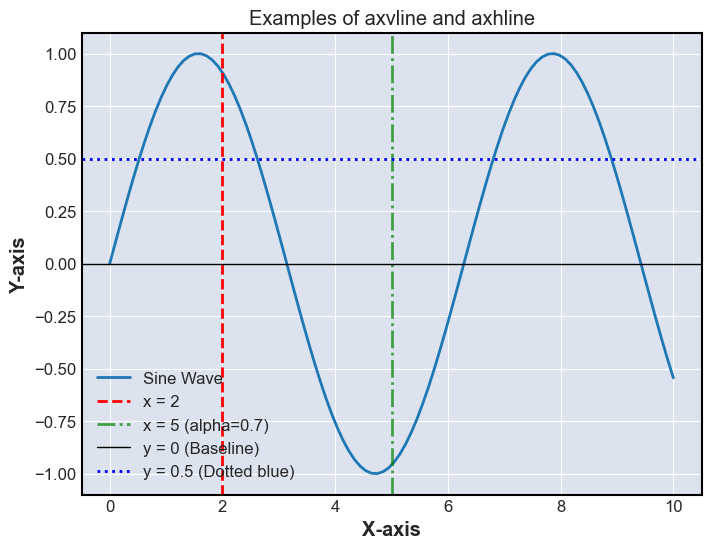

In [689]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Generate data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot sine wave
ax.plot(x, y, label="Sine Wave")

# vertical lines (axvline)
# dashed red line which fills x=2
ax.axvline(x=2, color="r", linestyle="--", linewidth=2, label="x = 2")
# dash-dot green line which fills x=5
ax.axvline(x=5, color="g", linestyle="-.", linewidth=2, alpha=0.7, label="x = 5 (alpha=0.7)")

# horizontal lines (axhline)
# solid black line which fills y=0
ax.axhline(y=0, color="black", linestyle="-", linewidth=1, label="y = 0 (Baseline)")
# dotted blue line which fills y=0.5
ax.axhline(y=0.5, color="blue", linestyle=":", linewidth=2, label="y = 0.5 (Dotted blue)")

# Customize plot
ax.set_title("Examples of axvline and axhline")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.legend()
ax.grid(True)

# Show plot
plt.show()

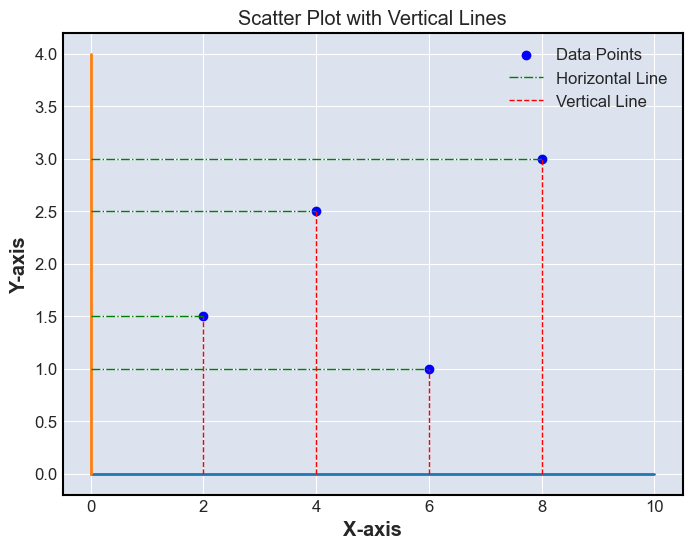

In [690]:
x_points = [2, 4, 6, 8]
y_points = [1.5, 2.5, 1.0, 3.0]
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x_points, y_points, color="b", label="Data Points")

# draw OX and OY axis
ax.plot(np.linspace(0, 10, 24), np.zeros(24))
ax.plot(np.zeros(20), np.linspace(0.0, 4.0, 20))

# draw horizontal and vertical lines to connect dots with the relevant axis
for i, (x, y) in enumerate(zip(x_points, y_points)):
    ax.hlines(y=y, xmin=0, xmax=x, colors='g', linestyles='-.', linewidth=1, label="Horizontal Line" if i == 0 else None)
    ax.vlines(x=x, ymin=0, ymax=y, colors='r', linestyles='--', linewidth=1, label="Vertical Line" if i == 0 else None)

ax.set_title("Scatter Plot with Vertical Lines")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.legend()
ax.grid(True)

plt.show()

<hr><br><hr>

## 1.5 - Plotting DataFrame info

,Temperature,Sales
0,37,292
1,40,228
11,42,320
2,49,324
10,53,324
3,61,376
9,64,412
4,72,440
8,75,496
5,79,496


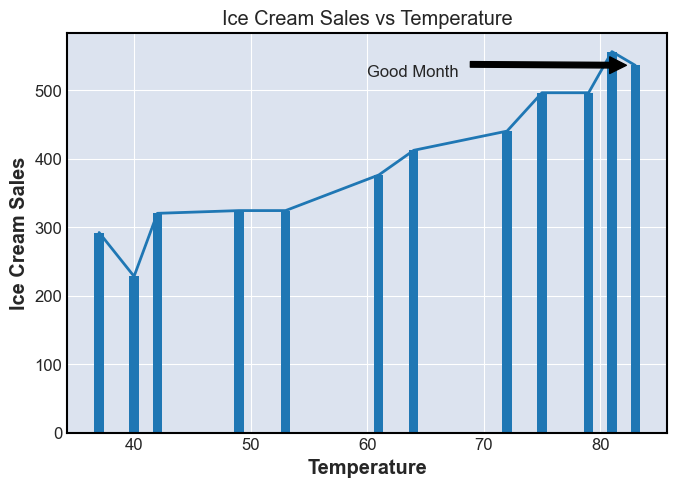

In [693]:
ice_df_sample = ice_cream_sales.copy()
sorted_ice = ice_df_sample.sort_values(by="Temperature", ascending=True)
display(sorted_ice)

np_arr = sorted_ice.values # convert data frame to an np array
x = np_arr[:,0] # get first column of information (Temperature)
y = np_arr[:,1] # get second column of information (Sales)
fig = plt.figure(figsize=(6,4))
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel("Temperature")
axes.set_ylabel("Ice Cream Sales")
axes.set_title("Ice Cream Sales vs Temperature")
axes.plot(x,y)

# arrow annotation
axes.annotate("Good Month", xy=(83,536), xytext=(60, 520),
              arrowprops=dict(facecolor="black", shrink=0.05))

# add plot bars
plt.bar(x, y)
plt.show()

<br><hr><br>

## 1.6 - TeX Markup

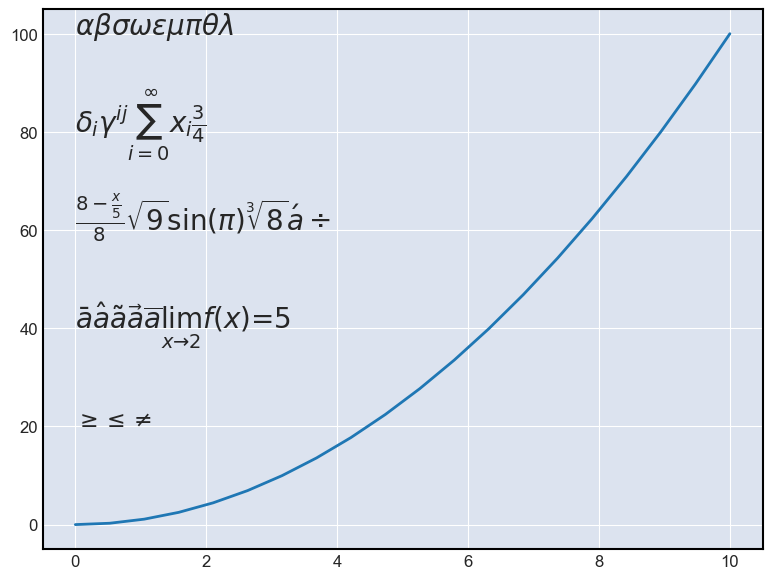

In [696]:
# TeX Markup

x = np.linspace(0, 10, 20)
y = x**2

fig = plt.figure(figsize=(8,6), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])

axes.text(0,100, r"$\alpha \beta \sigma \omega \epsilon \mu \pi \theta \lambda$", fontsize=20)

axes.text(0,80, r"$\delta_i \gamma^{ij} \sum_{i=0}^\infty x_i \frac{3}{4}$", fontsize=20)

axes.text(0, 60, r"$\frac{8 - \frac{x}{5}}{8} \sqrt{9} \sin(\pi) \sqrt[3]{8} \acute a \div$", fontsize=20)

axes.text(0, 40, r"$\bar a \hat a \tilde a \vec a \overline {a} \lim_{x \to 2} f(x) = 5$", fontsize=20)

axes.text(0, 20, r"$\geq \leq \ne$", fontsize=16)

axes.plot(x, y)
plt.show()

<br><hr><br>

## 1.7 - Tables ----------- (TODO)

In [699]:
# df = stocks_data.copy().tail(5)

In [700]:
# df = stocks_data.copy()
# df.columns = [col[0] for col in df.columns]

# # perform round to 2 digits, after the float's dot, for all cols except "Volume"
# for col in df.columns:
#     if col == "Volume":
#         # continue
#     df[col] = pd.Series([round(val, 2) for val in df[col]], index=df.index)

# # get recent last days of stock data
# stock_data = df[-5:]
# display(df)

# # define headers for the table
# col_head = ("Date", "Open", "High", "Low", "Close", "Volume")

# # reset index of stock_data and convert stock_data to numpy
# stock_data_np = stock_data.reset_index().to_numpy()

# # plot the figure with a .5 padding from all sides
# plt.figure(figsize=(7,4), linewidth=2)

# # get rid of the whole plot which gets generated above the table
# axes = plt.gca() # get current axes
# axes.get_xaxis().set_visible(False) # hide X axis
# axes.get_yaxis().set_visible(False) # hide Y axis
# plt.box(on=None) # get rid of the plot box

# # create color map
# colors = plt.cm.Blues(np.full(len(col_head), 0.2))

# # create table
# display(stock_data)

# table = plt.table(cellText=stock_data_np, loc="center", colLabels=col_head,
#                   colColours=colors)

# # scale table
# table.scale(3, 2.5)

# # add title
# plt.text(0.5, 1.15, "Last 5 days Stock Data", fontsize=14, fontweight="bold", ha="center", transform=plt.gca().transAxes)
# plt.show()

<br><hr><hr><br>

# 2) 2D Plots

<br><hr><br>

## 2.1 - Line Plot

* **Use when**:
    * Showing trensds over time, like stock prices, web traffic
    * Displaying continuous data relationships
* **Avoid when**:
    * Data points are categorical or not connected
    * Too many overlapping lines make it clustered
* **General Use Cases**:
    * Monthly Sales Trend
* **ML/AI Use Cases**:
    * Visualizing feature distribution in machine learning models
    * Checking data normality for assumptions in algorithms like linear regression or KNN

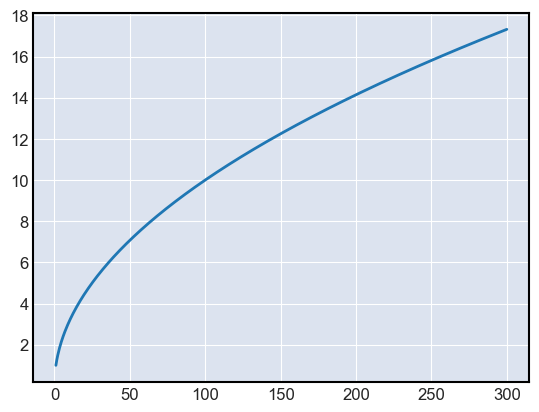

In [705]:
x = np.linspace(1, 300, 500)
y = np.sqrt(x)

plt.plot(x, y)
plt.show()

<br><hr><br>

### 2.1.1 - Timeseries ----------- (TODO)

* **Use when**:
    * Analyzing patterns over time
    * Detecting seasonality, trends, or cyclic behavior
* **Avoid when**:
    * Data is not time-based
    * There are too many fluctuating values making it unreadable
* **General Use Cases**:
    * Daily website traffic analysis
    * Stock price fluctuations over a year
    * Temperature variations over a month
* **ML/AI Use Cases**:
    * Forecasting tasks like stock price prediction like ARIMA models
    * Time series analysis for sensor data or weather forecasting

In [708]:
# stocks_data_sample = stocks_data.copy()

# df_to_np = stocks_data_sample.to_numpy()
# y = df_to_np[:, 4]

# holidays = [datetime.datetime(2024,12,24), datetime.datetime(2024, 12, 31)]
# date_arr = pd.bdate_range(start="4/1/2010", end="31/12/2024", freq="C", holidays=holidays)
# x = date_arr[:len(y)].to_numpy()

# fig = plt.figure(figsize=(8,5))
# axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
# plt.plot(x, y)

<br><hr><br>

## 2.2 - Histogram

* **Use when**:
    * Showing the distribution of a dataset, like age groups, income levels
    * Checking for skewness, outliers, or data spread.
* **Avoid when**:
    * Data is categorical (use a bar chart instead).
    * You need exact values instead of a distribution.
* **General Use Cases**:
    * Distribution of student exam scores
    * Income distribution across a city
    * Website load time frequency
* **ML/AI Use Cases**:
    * Visualizing feature distribution in machine learning models
    * Checking data normality for assumptions in algorithms like linear regression or KNN

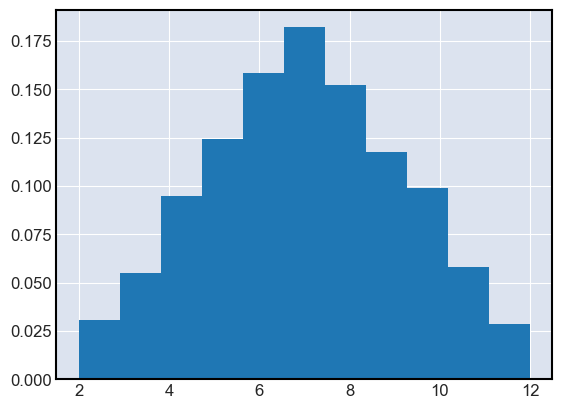

In [711]:
# Plot a histogram to highlight the chances of a number to be between 1 and 6 out of 10000 tries

arr_1 = np.random.randint(1,7,5000)
arr_2 = np.random.randint(1,7,5000)
arr_3 = arr_1 + arr_2

# bins = number of bars
# density = returns the frequency of each of the bins
plt.hist(arr_3, bins=11, density=True, stacked=True)
plt.show()

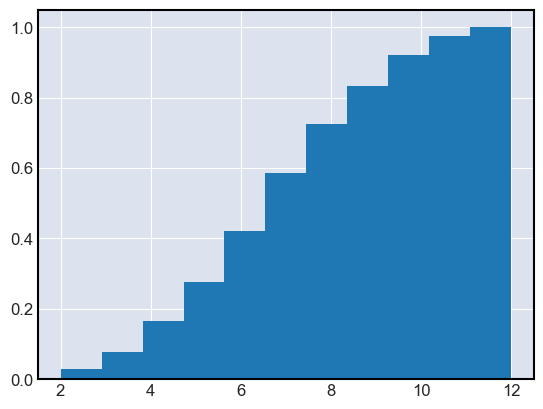

In [712]:
# cumulative = use a cumulative distribution
plt.hist(arr_3, bins=11, density=True, stacked=True, cumulative=True)
plt.show()

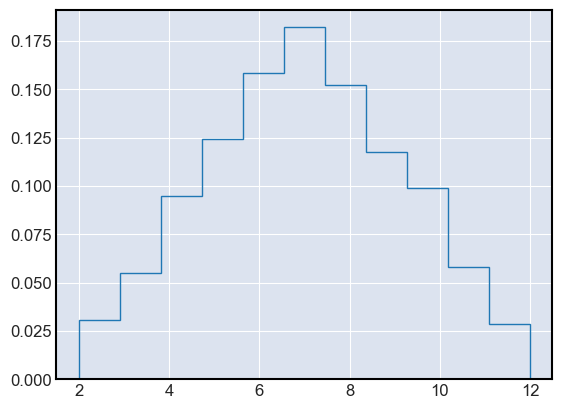

In [713]:
# histtype="step" generates a line plot
plt.hist(arr_3, bins=11, density=True, stacked=True, histtype="step")
plt.show()

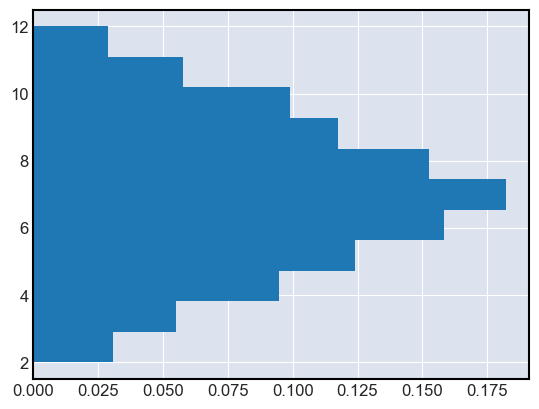

In [714]:
# orientation = "vertical" or "horizontal"
plt.hist(arr_3, bins=11, density=True, stacked=True, orientation="horizontal")
plt.show()

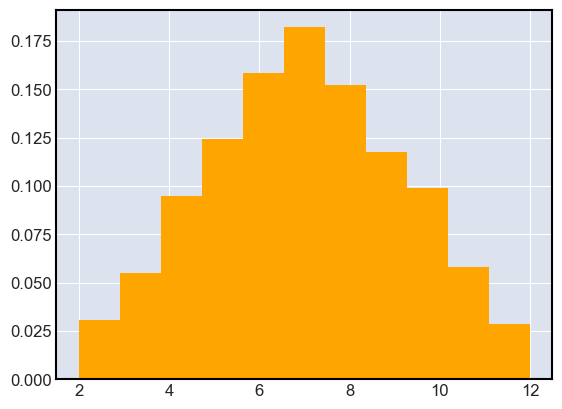

In [715]:
# color = change bars color
plt.hist(arr_3, bins=11, density=True, stacked=True, color="orange")
plt.show()

<br><hr><br>

## 2.3 - Bar Charts

* **Use when**:
    * Comparing categories, like sales by product survey responses
    * Visualizing discrete data points
* **Avoid when**:
    * Showing time trends (use a line chart instead)
    * Too many categories make the chart unreadable
* **General Use Cases**:
    * Top 5 best-selling products
    * Number of customers by region
    * Comparison of annual revenue by company
* **ML/AI Use Cases**:
    * Visualizing class distribution in classification problems
    * Feature importance in machine learning models, like Random Forests

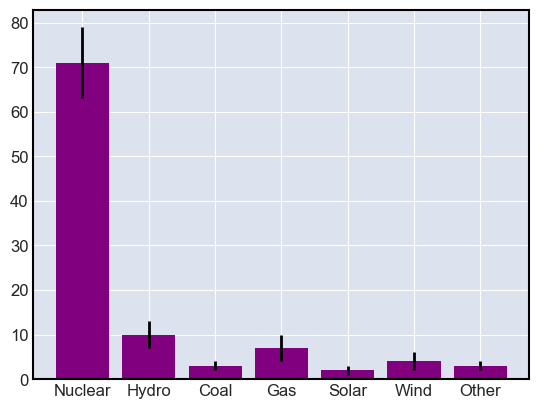

In [718]:
# go through the percentages of how France gets its electricity

x = ["Nuclear", "Hydro", "Coal", "Gas", "Solar", "Wind", "Other"]
per_1 = [71, 10, 3, 7, 2, 4, 3]  # percentage
variance = [8, 3, 1, 3, 1, 2, 1] # variance per year
plt.bar(x, per_1, color="purple", yerr=variance)
plt.show()

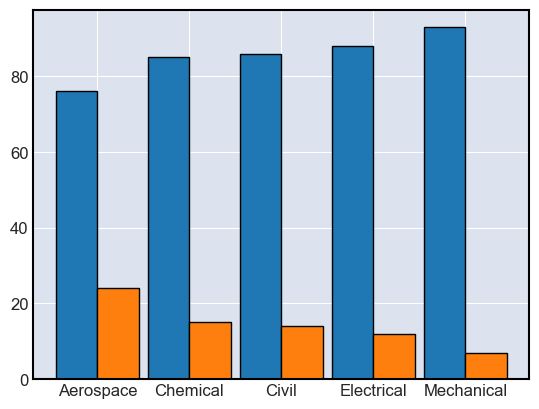

In [719]:
# go through the percentages for males and females in the different branches of engineering

m_eng = (76, 85, 86, 88, 93)        # male engineers
f_eng = (24, 15, 14, 12, 7)         # female engineers
evenly_spaced_values = np.arange(5) # iteration index

plt.bar(evenly_spaced_values, m_eng, width=0.45, label="Male", edgecolor="k")
plt.bar(evenly_spaced_values + 0.45, f_eng, width=0.45, label="Female", edgecolor="k")
plt.xticks(evenly_spaced_values + 0.45 / 2, ("Aerospace", "Chemical", "Civil", "Electrical", "Mechanical"))
plt.show()

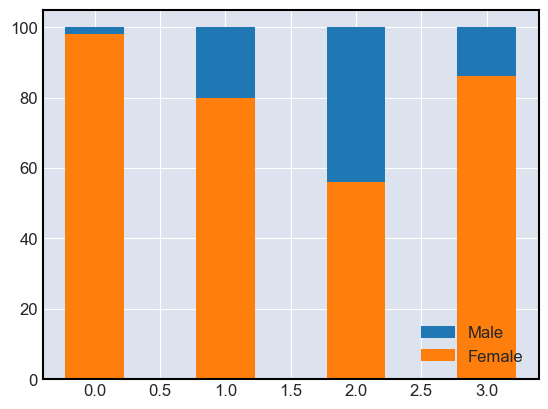

In [720]:
# Stacked Bar Chart

t_type = ["Kindergarden", "Elementary School", "Secondary School", "Special School"]
m_teach = np.array([2, 20, 44, 14])
f_teach = np.array([98, 80, 56, 86])
index = [x for x, _ in enumerate(t_type)]

plt.bar(index, m_teach, width=0.45, label="Male", bottom=f_teach)
plt.bar(index, f_teach, width=0.45, label="Female")
plt.legend(loc="lower right")

<br><hr><br>

## 2.4 - Pie Charts

* **Use when**:
    * Showing proportions of a whole, like market share, budget breakdown
    * Data represents percentages that sum to 100%
* **Avoid when**:
    * Too many slices make it hard to read (use a bar chart instead)
    * Small differences are hard to compare visually
* **General Use Cases**:
    * Market share of smartphone brands
    * Company expense breakdown
    * Distribution of social media traffic sources
* **ML/AI Use Cases**:
    * Visualizing classification results or category proportions in a dataset
    * Displaying prediction probabilities for multi-class models

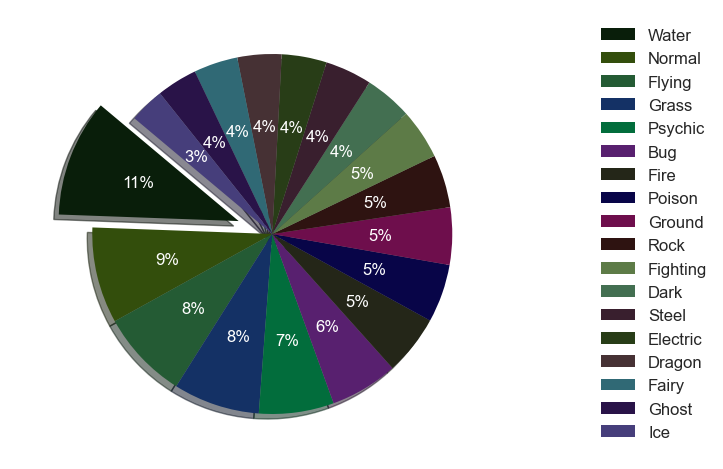

In [723]:
# create a pie chart of the number of pokemon by type

fig = plt.figure(figsize=(8,5), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])

types = ["Water", "Normal", "Flying", "Grass", "Psychic", "Bug", "Fire", "Poison", "Ground",
         "Rock", "Fighting", "Dark", "Steel", "Electric", "Dragon", "Fairy", "Ghost", "Ice"]
poke_num = [133, 109, 101, 98, 85, 77, 68, 66, 65, 60, 57, 54, 53, 51, 50, 50, 46, 40]

colors = []

# generate different colors for the pie slices
for i in range(18):
    colors.append((np.random.uniform(0, .5), np.random.uniform(0, .5), np.random.uniform(0, .5)))

# explode sizes
explode = [0] * 18
explode[0] = 0.2 # explode the first item with 0.2 out of the pichart

wedges, texts, autotexts = plt.pie(poke_num,            # data values for the pie chart
                                   explode=explode,     # offsets slices from the center for emphasis
                                   labels=types,        # labels for each slice
                                   colors=colors,       # colors assigned to each slice
                                   autopct="%1.0f%%",   # displays percentage values on slices
                                   shadow=True,         # adds a shadow effect to the chart
                                   startangle=140,      # rotates the pie chart to start at 140 degrees
                                   textprops=dict(color="w"))  # text properties, here setting the color to white

plt.legend(wedges, types,
           loc="right", # loc="right" positions the legend on the right
           bbox_to_anchor=(1, 0, 0.5, 1))  # bbox_to_anchor=(1, 0, 0.5, 1) adjusts the legend box position relative to the chart

<br><hr><br>

## 2.5 - Scatterplot

* **Use when**:
    * Showing relationships between two variables like height vs weight
    * Identifying correlations and outliers
* **Avoid when**:
    * Data is categorical (use a bar chart instead)
    * Too many overlapping points make the plot unreadable (consider heatmap)
* **General Use Cases**:
    * Study hours vs exam scores
    * Ad spend vs sales revenue
    * Age vs cholesterol levels
* **ML/AI Use Cases**:
    * Visualizing relationships between features in regression analysis
    * Outlier detection in datasets
    * Visualizing clusters after applying clustering algorithms like K-means

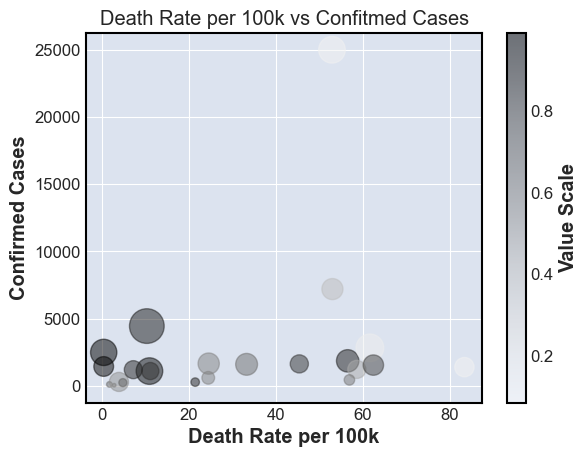

In [726]:
# country array
c_arr = np.array([
    "Australia", "Brazil", "Canada", "Chile", "France", "Germany", "Greece",
    "Iceland", "India", "Iran", "Italy", "Mexico", "New Zealand", "Nigeria",
    "Norway", "Pakistan", "Peru", "Russia", "Saudi Arabia", "Singapore",
    "South Africa", "Spain", "Sweden", "Turkey", "UK", "US"
])

# death rate per 100k Coronavirus
dr_arr = np.array([
    1.8, 53, 24.5, 56.5, 45.4, 11.2, 2.2,
    2.8, 4, 24.6, 58.6, 0.5, 0.5,
    4.9, 2.9, 83.3, 11, 10.4, 0.5,
    21.5, 61.6, 33.3, 56.9, 7.3, 62.4, 52.9
])

# daily confirmed cases (tests)
test_arr = np.array([
    110, 7197, 600, 1862, 1636, 1103, 35,
    10, 295, 1658, 1226, 2490, 8, 243,
    48, 1395, 1101, 4447, 1443, 280,
    2830, 1602, 447, 1205, 1546, 24988
])

# dot size Confirmed cases
cc_arr = np.array([
    24236, 345652, 125408, 390037, 256534, 229706, 7684,
    2035, 283695, 350279, 255278, 537031, 1654, 50488,
    10162, 290845, 549321, 935066, 302686, 56031,
    596060, 370867, 85411, 253108, 323008, 552824
])

cc_arr_sm = cc_arr / 1500 # make the size of the dots smaller
color_arr = np.random.rand(26)
 # "s" stands for size
 # "c" stands for color
plt.scatter(dr_arr, test_arr, s=cc_arr_sm, c=color_arr, alpha=0.5)

plt.title("Death Rate per 100k vs Confitmed Cases")
plt.xlabel("Death Rate per 100k")
plt.ylabel("Confirmed Cases")
plt.colorbar(label='Value Scale')

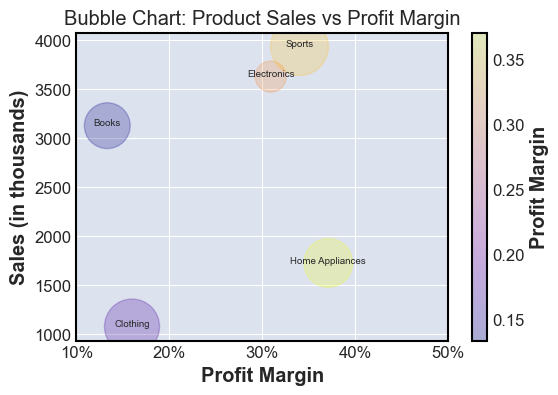

In [727]:
# example: Product Sales vs Profit Margin
product_categories = ['Electronics', 'Clothing', 'Home Appliances', 'Books', 'Sports']
profit_margins = np.random.uniform(0.1, 0.5, 5)  # Profit margins between 10% and 50%
sales = np.random.randint(1000, 5000, 5)  # Sales data (in thousands)
sizes = np.random.randint(500, 2000, 5)  # Bubble sizes (based on sales)

plt.figure(figsize=(6, 4))
plt.scatter(profit_margins, sales, s=sizes, alpha=0.25, c=profit_margins, cmap='plasma')
plt.title("Bubble Chart: Product Sales vs Profit Margin")
plt.xlabel("Profit Margin")
plt.ylabel("Sales (in thousands)")
plt.colorbar(label="Profit Margin")
plt.xticks(np.linspace(0.1, 0.5, 5), ['10%', '20%', '30%', '40%', '50%'])
for i, category in enumerate(product_categories):
    plt.text(profit_margins[i], sales[i], category, fontsize=7, ha='center')
plt.show()

<br><hr><br>

## 2.6 - Heatmap

* **Use when**:
    * Showing correlations between multiple variables
    * Identifying correlations and outliers
* **Avoid when**:
    * Data doesn’t have a logical x-y relationship
    * The dataset is too small (use a bar chart instead)
* **General Use Cases**:
    * Correlation between financial metrics
    * Crime rates by neighborhood
    * Website user engagement by day and hour
* **ML/AI Use Cases**:
    * Feature correlation analysis for feature selection
    * Visualizing confusion matrices for classification models
    * Visualizing the relationship between hyperparameters and model performance, like grid search

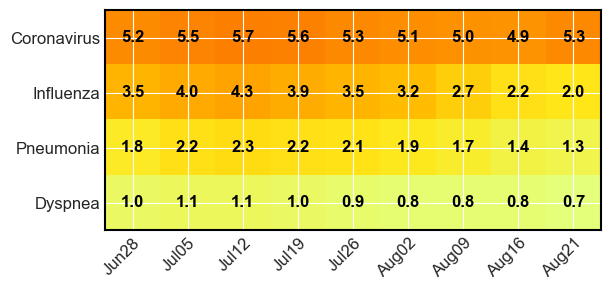

In [730]:
# represent the number of people going to the hospital due to a secific condition, overtime

symptoms = ["Coronavirus", "Influenza", "Pneumonia", "Dyspnea"]
dates =["Jun28", "Jul05", "Jul12", "Jul19", "Jul26", "Aug02", "Aug09", "Aug16", "Aug21"]
symptom_percentage = np.array([ # percentages for all the people that went to hospital
    [5.2, 5.5, 5.7, 5.6, 5.3, 5.1, 5.0, 4.9, 5.3],
    [3.5, 4.0, 4.3, 3.9, 3.5, 3.2, 2.7, 2.2, 2.0],
    [1.8, 2.2, 2.3, 2.2, 2.1, 1.9, 1.7, 1.4, 1.3],
    [1.0, 1.1, 1.1, 1.0, 0.9, 0.8, 0.8, 0.8, 0.7]
])

fig, axes = plt.subplots()
im = axes.imshow(symptom_percentage, cmap="Wistia")

axes.set_xticks(np.arange(len(dates)))
axes.set_yticks(np.arange(len(symptoms)))
axes.set_xticklabels(dates)
axes.set_yticklabels(symptoms)

plt.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(symptoms)):
    for j in range(len(dates)):
        text = axes.text(j, i, symptom_percentage[i, j], ha="center", va="center", color="k", fontweight="bold")

<br><hr><br>

## 2.7 - Box Plot (Box-and-Whisker Plot)

* **Use when**:
    * Showing data spread, outliers, and quartiles
    * Comparing distributions across multiple categories
* **Avoid when**:
    * The dataset is small (use a scatter plot instead)
    * You need to see individual data points
* **General Use Cases**:
    * Salary distribution across different job roles
    * Exam score comparison across different schools
    * Comparison of transaction amounts across different payment methods
* **ML/AI Use Cases**:
    * Identifying outliers in feature distributions
    * Comparing model performance across different hyperparameters or algorithms
    * Visualizing the distribution of model error across different data splits

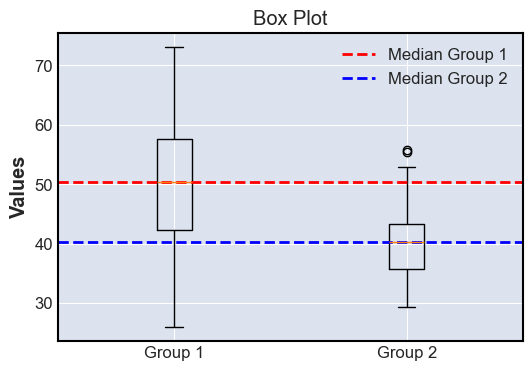

In [733]:
data_1 = np.random.randn(100) * 10 + 50
data_2 = np.random.randn(100) * 5 + 40
plt.figure(figsize=(6, 4))
plt.boxplot([data_1, data_2], tick_labels=["Group 1", "Group 2"])
plt.title("Box Plot")
plt.ylabel("Values")
plt.axhline(np.median(data_1), color='red', linestyle='--', label='Median Group 1')
plt.axhline(np.median(data_2), color='blue', linestyle='--', label='Median Group 2')
plt.legend()
plt.show()

<br><hr><br>

## 2.8 - Area Chart

* **Use when**:
    * Showing trends over time with an emphasis on volume
    * Stacking multiple series to compare proportions
* **Avoid when**:
    * Data points are few (use a bar chart instead)
    * Not interested in cumulative volume
* **General Use Cases**:
    * User growth over time
    * Market share changes over years
    * Cumulative rainfall over a season
* **ML/AI Use Cases**:
    * Visualizing cumulative predictions or errors in time series models
    * Stacking multiple models or outputs over time to compare performance

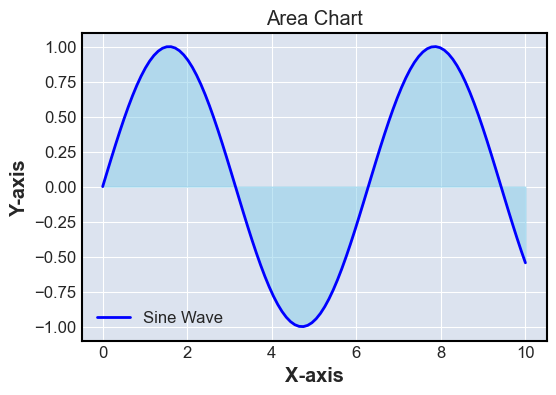

In [736]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(6, 4))
plt.fill_between(x, y, color='skyblue', alpha=0.5)
plt.plot(x, y, color='blue', label='Sine Wave')
plt.title("Area Chart")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

<br><hr><br>

## 2.9 - Step Plot

* **Use when**:
    * Showing discrete changes over time like stock price jumps, event-driven changes
    * Tracking count-based data changes
* **Avoid when**:
    * Data is continuous (use a line plot instead)
    * The audience may misinterpret step changes as smooth transitions
* **General Use Cases**:
    * Stock price movements throughout the day
    * Electricity usage billing rates by hour
    * Number of software users after major updates
* **ML/AI Use Cases**:
    * Displaying piecewise functions, such as reward changes in reinforcement learning
    * Visualizing changes in training hyperparameters over time

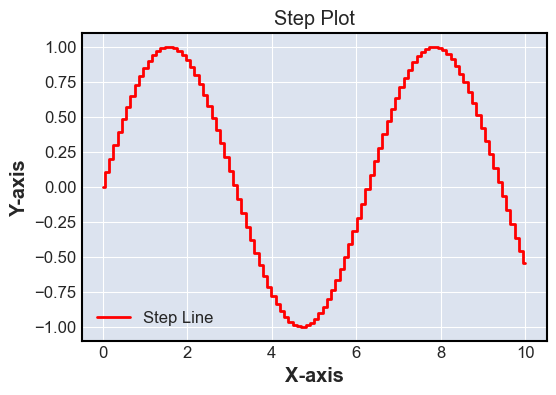

In [739]:
plt.figure(figsize=(6, 4))
plt.step(x, y, where='mid', color='red', label='Step Line')
plt.title("Step Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

<br><hr><br>

## 2.10 - Polar Chart

* **Use when**:
    * Comparing multi-dimensional data like skill ratings, sports performance
    * Displaying strengths and weaknesses across categories
* **Avoid when**:
    * Comparing too many categories, making it cluttered
    * A simple bar chart can convey the same message
* **General Use Cases**:
    * Player performance in different skills (speed, agility, strength, endurance)
    * Feature comparison of different software tools
    * Customer satisfaction ratings across multiple service aspects
* **ML/AI Use Cases**:
    * Comparing multi-dimensional features or model performance metrics across multiple tasks
    * Visualizing evaluation metrics (ex: F1-score, precision, recall, and accuracy) for classification models

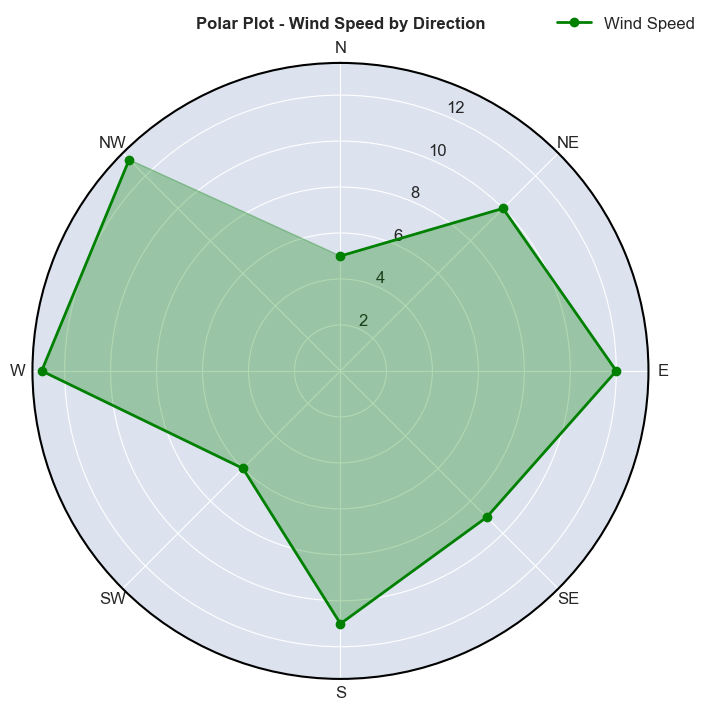

In [742]:

angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)  # 8 wind directions
wind_speeds = np.random.randint(5, 20, size=8)  # random wind speeds

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, wind_speeds, marker='o', linestyle='-', color='green', label='Wind Speed')
ax.fill(angles, wind_speeds, color='green', alpha=0.3)  # fill for better visualization

ax.text(0.5, 1.05, "Polar Plot - Wind Speed by Direction", transform=ax.transAxes,
        ha="center", va="bottom", fontsize=12, fontweight="bold")
ax.set_theta_zero_location("N")  # set North as the zero direction
ax.set_theta_direction(-1)  # set direction clockwise
ax.set_xticks(angles)  # tick positions
ax.set_xticklabels(["N", "NE", "E", "SE", "S", "SW", "W", "NW"])  # cardinal points
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

<br><hr><hr><br>

# 3) 3D Plots

<br><hr><br>

## 3.1 - Scatter Plot

* **Use when**:
    * Finding clusters, correlations, and outliers in high-dimensional data
    * Visualizing relationships in 3D feature spaces
* **Avoid when**:
    * Too many points overlap, making it hard to interpret
    * Data is sparse or not well-distributed
* **General Use Cases**:
    * Visualizing clusters in customer segmentation data
    * Displaying outliers in a 3D feature space
    * Exploring relationships between three variables (ex: weight, height, and age)
* **ML/AI Use Cases**:
    * Visualizing feature spaces after dimensionality reduction, like PCA
    * Checking for patterns in high-dimensional data after applying clustering algorithms like K-means
    * Visualizing decision boundaries in classification tasks

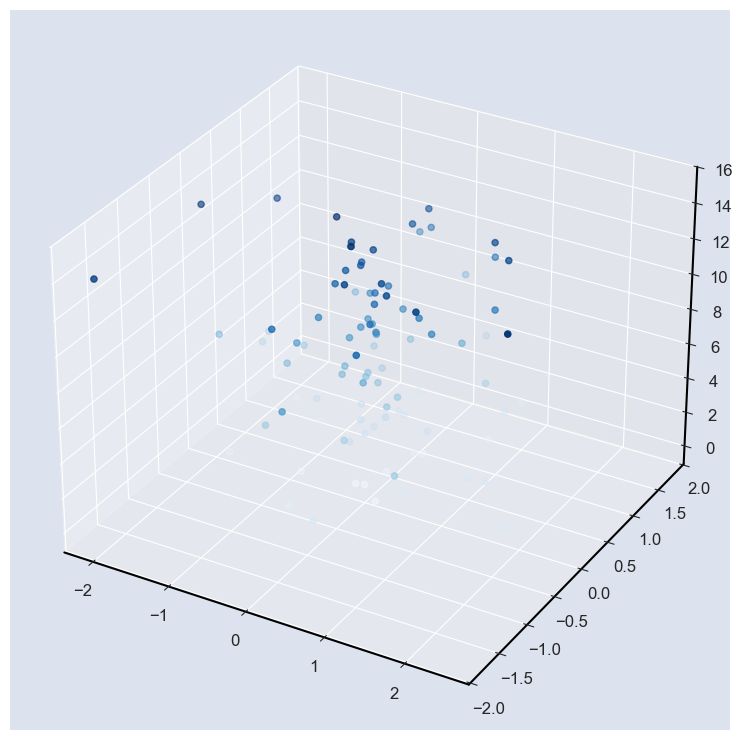

In [747]:
fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection="3d")

z = 15 * np.random.random(100)
x = np.sin(z) * np.random.randn(100)
y = np.sin(z) * np.random.randn(100)
axes.scatter3D(x, y, z, c=z, cmap="Blues")

<br><hr><br>

## 3.2 - Contour Plot

* **Use when**:
    * Visualizing decision boundaries or cost functions in a 3D space
    * Understanding optimization landscapes and function minima
* **Avoid when**:
    * Data is sparse or overly simple
    * The function or data is discrete, as it doesn’t show well in a continuous space
* **General Use Cases**:
    * Showing loss surfaces in optimization problems
    * Displaying terrain data, like topographic maps
* **ML/AI Use Cases**:
    * Understanding gradient descent and decision regions in machine learning models
    * Visualizing loss functions in machine learning optimization
    * Showing SVM decision surfaces in classification tasks
    * Visualizing optimization landscapes during training (ex: in neural networks)

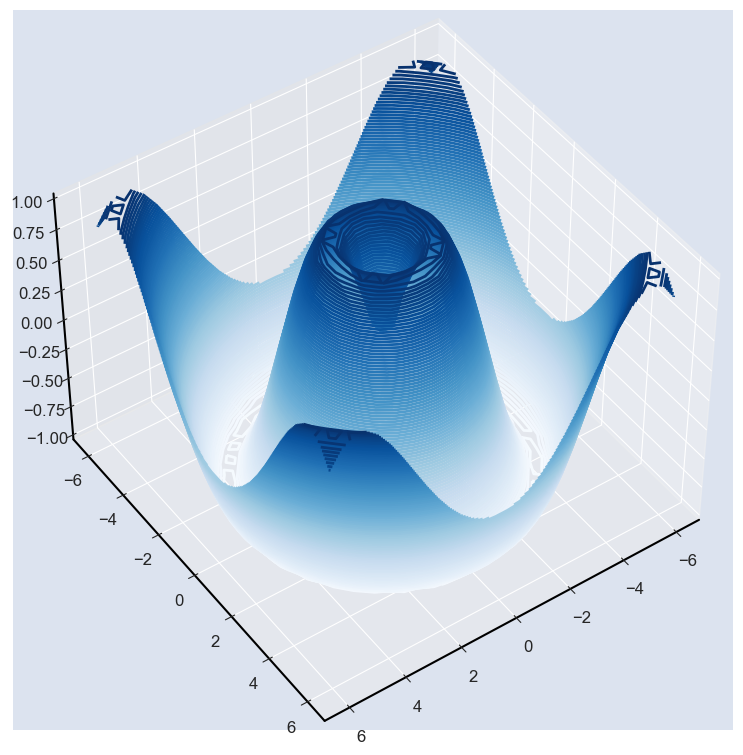

In [750]:
def get_z(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection="3d")

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

x, y = np.meshgrid(x, y)
z = get_z(x,y)

# change viewing angle at 45 degrees, and rotate at 55 degrees
axes.view_init(45, 55)
axes.contour3D(x, y, z, 100, cmap="Blues")

<br><hr><br>

## 3.3 - Wireframe Plot

* **Use when**:
    * Checking 3D patterns without shading for clarity
    * Exploring how a surface behaves in a grid space
* **Avoid when**:
    * Low grid resolution results in poor detail
    * The data is complex and requires a more detailed representation
* **General Use Cases**:
    * Displaying simple geometric surfaces or grids
    * Visualizing basic topography without complexity
    * Showing structural patterns, like building designs
* **ML/AI Use Cases**:
    * Exploring high-dimensional feature spaces and interactions between multiple variables
    * Analyzing hyperparameter tuning results in machine learning
    * Visualizing decision surfaces with lower complexity compared to surface plots

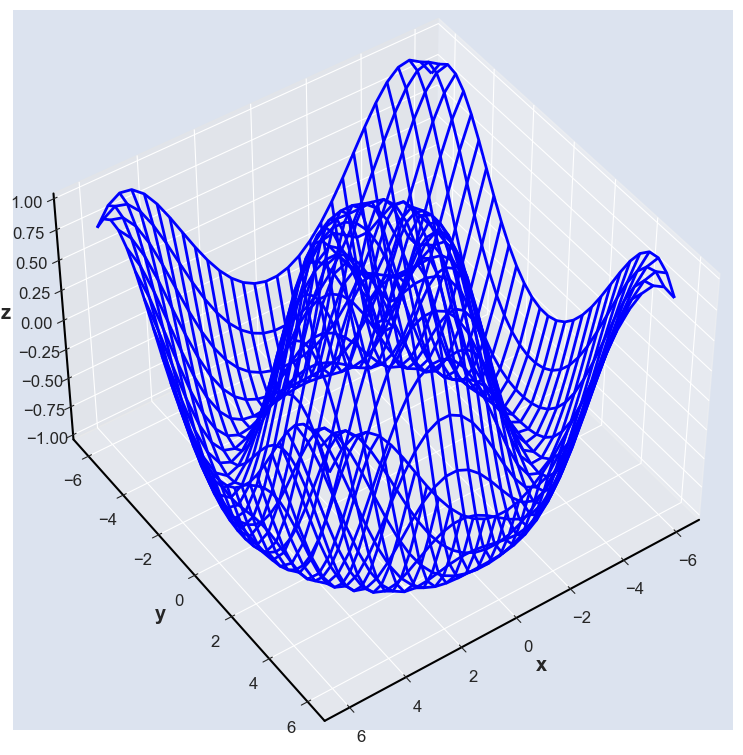

In [753]:
def get_z(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure(figsize=(16, 8), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection="3d")

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

x, y = np.meshgrid(x, y)
z = get_z(x,y)

# change viewing angle at 45 degrees, and rotate at 55 degrees
axes.view_init(45, 55)

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")

axes.plot_wireframe(x, y, z, color="Blue")

<br><hr><br>

## 3.4 - Surface Plot

* **Use when**:
    * Representing continuous surfaces in 3D space
    * Visualizing smooth data across multiple dimensions
* **Avoid when**:
    * The data is discrete or not continuous, as it may distort the surface
    * High complexity surfaces result in overly crowded visuals
* **General Use Cases**:
    * Displaying smooth topographic surfaces like mountains, valleys
    * Visualizing complex equations or models in 3D
    * Understanding how one variable impacts two others in real-time
* **ML/AI Use Cases**:
    * Visualizing loss surfaces to analyze model optimization
    * Analyzing model confidence and uncertainty in predictions
    * Exploring relationships between features in advanced regression models

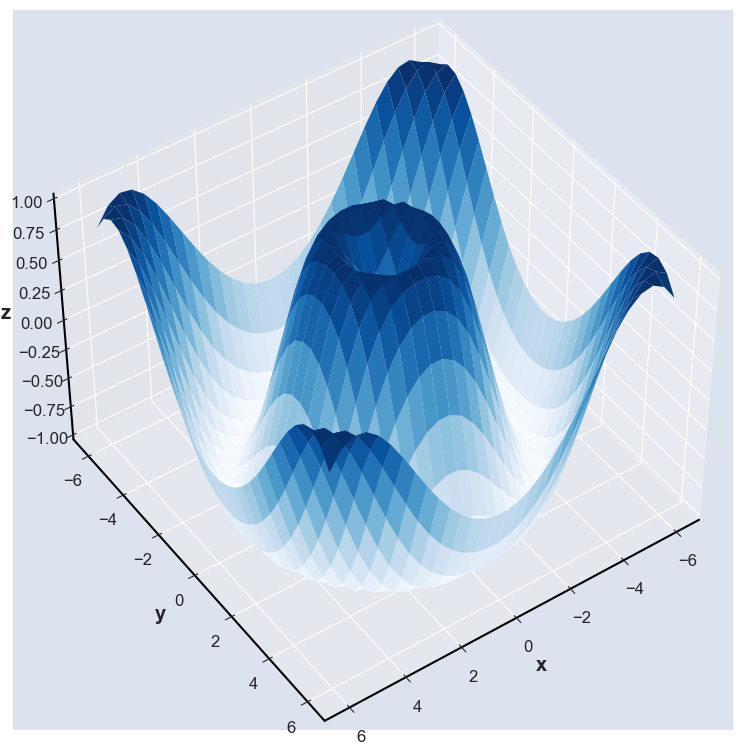

In [756]:
def get_z(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure(figsize=(14, 8), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection="3d")

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

x, y = np.meshgrid(x, y)
z = get_z(x,y)

# change viewing angle at 45 degrees, and rotate at 55 degrees
axes.view_init(45, 55)

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")

axes.plot_surface(x, y, z, cmap="Blues")

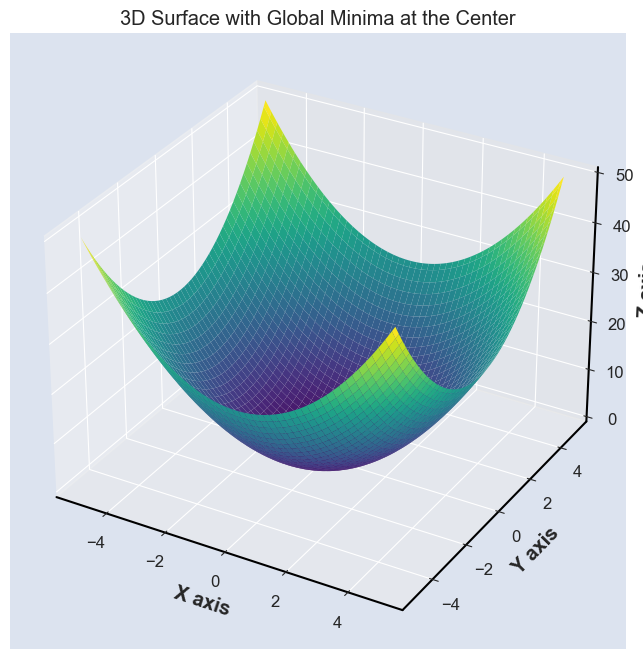

In [757]:

# define the function with a global minima at the center (0, 0)
def f(x, y):
    return x**2 + y**2  # simple paraboloid shape

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface with Global Minima at the Center')

plt.show()

<br><hr><hr><br>

# 4) Matplotlib Finance ----------- (TODO)

<table>
    <thead>
        <tr>
            <th>Feature</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Candlestick Charts</td>
            <td>OHLC, candlesticks, line, Renko, PDF</td>
        </tr>
        <tr>
            <td>Moving Averages</td>
            <td>Simple, Exponential, Multiple Periods</td>
        </tr>
        <tr>
            <td>Technical Indicators</td>
            <td>Bollinger Bands, RSI, MACD, Custom</td>
        </tr>
        <tr>
            <td>Volume Display</td>
            <td>Shows trading volume alongside price charts</td>
        </tr>
        <tr>
            <td>Styling and Themes</td>
            <td>Predefined and custom themes</td>
        </tr>
        <tr>
            <td>Multi-panel Layouts</td>
            <td>Arrange multiple indicators and subplots</td>
        </tr>
        <tr>
            <td>Save and Export</td>
            <td>PNG, JPG, PDF formats</td>
        </tr>
        <tr>
            <td>Real-time and Animated Plots</td>
            <td>Live stock price updates</td>
        </tr>
    </tbody>
</table>

In [760]:
# df = stocks_data.copy()

# df.columns = [col[0] for col in df.columns]
# df.index = pd.to_datetime(df.index)
# df.index.name = "Date"

## 4.1 - Candlestick Chart

In [762]:
# mpf.plot(df, type="candle", title="AAPL Candle Chart")
# mpf.show()

## 4.2 - OHLC (Open-High-Low-Close) Chart

In [764]:
# mpf.plot(df, type="ohlc", title="AAPL OHLC Chart")
# mpf.show()

## 4.3 - Line Chart

In [766]:
# mpf.plot(df, type="line", title="AAPL Line Chart")
# mpf.show()

## 4.4 - Renko Chart

In [768]:
# mpf.plot(df, type="renko", title="AAPL Renko Chart")
# mpf.show()

## 4.5 - Point and Figure Chart

In [770]:
# mpf.plot(df, type="pnf", title="AAPL Point & Figure Chart")
# mpf.show()

<br><hr><hr><br>

# 5) ML Functions

<table>
  <tr>
    <th>Function</th>
    <th>Best For</th>
    <th>Key Advantage</th>
    <th>Limitation</th>
  </tr>
  <tr>
    <td>Sigmoid</td>
    <td>Logistic Regression</td>
    <td>Maps to (0,1)</td>
    <td>Vanishing gradient</td>
  </tr>
  <tr>
    <td>Tanh</td>
    <td>Neural Networks</td>
    <td>Zero-centered</td>
    <td>Still vanishes at extremes</td>
  </tr>
  <tr>
    <td>ReLU</td>
    <td>Deep Learning</td>
    <td>Fast & simple</td>
    <td>Dying ReLU problem</td>
  </tr>
  <tr>
    <td>Leaky ReLU</td>
    <td>CNNs & DNNs</td>
    <td>Fixes Dying ReLU</td>
    <td>Hyperparameter tuning needed</td>
  </tr>
  <tr>
    <td>Softmax</td>
    <td>Classification</td>
    <td>Probability outputs</td>
    <td>Computational cost</td>
  </tr>
  <tr>
    <td>Swish</td>
    <td>Deep Learning</td>
    <td>Smooth & trainable</td>
    <td>More complex</td>
  </tr>
  <tr>
    <td>ELU</td>
    <td>Deep Learning</td>
    <td>Helps avoid dead neurons</td>
    <td>Computationally expensive</td>
  </tr>
  <tr>
    <td>GELU</td>
    <td>Transformer Models</td>
    <td>Smooth and differentiable</td>
    <td>More complex</td>
  </tr>
  <tr>
    <td>SELU</td>
    <td>Self-normalizing networks</td>
    <td>Self-normalizing</td>
    <td>Sensitive to initialization</td>
  </tr>
  <tr>
    <td>Hard Sigmoid</td>
    <td>Efficiency-critical tasks</td>
    <td>Computationally efficient</td>
    <td>Less smooth, more approximation error</td>
  </tr>
  <tr>
    <td>Softplus</td>
    <td>Replacement for ReLU</td>
    <td>Smooth and differentiable</td>
    <td>Slower than ReLU</td>
  </tr>
  <tr>
    <td>Maxout</td>
    <td>Generalized ReLU</td>
    <td>Can approximate any convex function</td>
    <td>Requires additional parameters</td>
  </tr>
  <tr>
    <td>Swish-1</td>
    <td>Deep Learning</td>
    <td>Smooth, better than ReLU in some cases</td>
    <td>Computationally slower</td>
  </tr>
</table>


<br><hr><br>

## 5.1 - Sigmoid
* Converts outputs into probabilities, in logistic regression
* Used as an activation function in early models, in neural netwirks
* Probability Estimation: Maps any real number to (0,1)

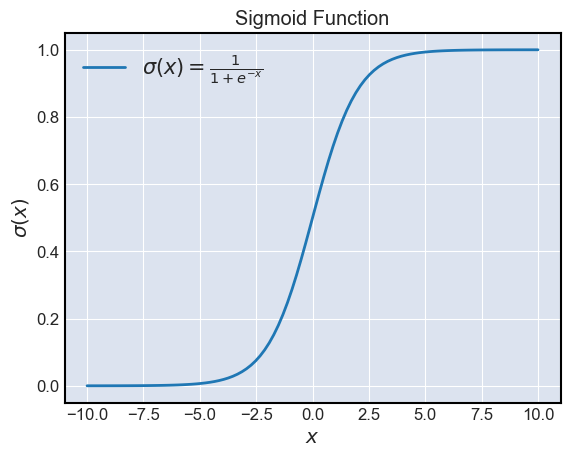

In [775]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\sigma(x)$")
ax.set_title("Sigmoid Function")

ax.grid(True)
ax.legend(fontsize=15)

<br><hr><br>

## 5.2 - Tanh
* Neural Networks → Used as an activation function in newural networks
* Better than Sigmoid, because outputs are in the range (-1,1), meaning that it's zero-centered

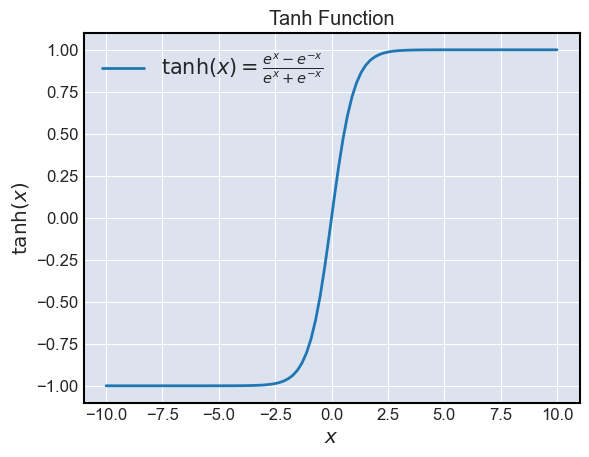

In [778]:
def tanh(x):
    return np.tanh(x)

y = tanh(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\tanh(x)$")
ax.set_title("Tanh Function")

ax.grid(True)
ax.legend(fontsize=15)

<br><hr><br>

## 5.3 - ReLU
* Most widely used activation function in deep learning
* Solves vanishing gradient issue (for positive values)
* Efficient & Simple leading to faster computation

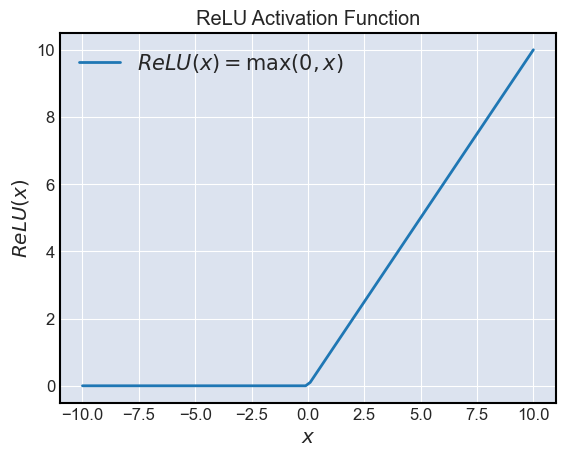

In [781]:
def relu(x):
    return np.maximum(0, x)

y = relu(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$ReLU(x) = \max(0, x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$ReLU(x)$")
ax.set_title("ReLU Activation Function")

ax.grid(True)
ax.legend(fontsize=15)

<br><hr><br>

## 5.4 - Leaky ReLU
* Fixes "Dying ReLU" problem, allowing small negative gradients
* Used in deep learning architectures for stable training

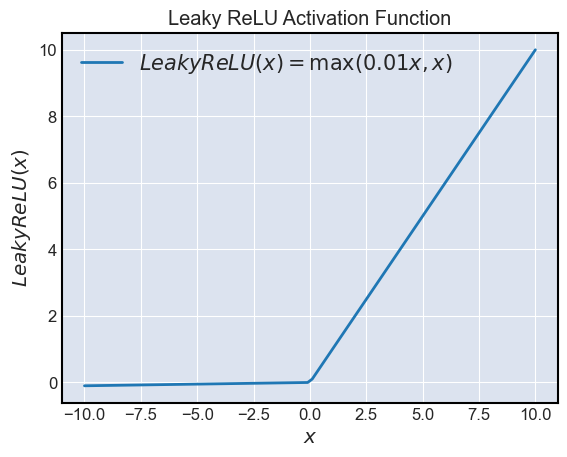

In [784]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

y = leaky_relu(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$LeakyReLU(x) = \max(0.01x, x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$LeakyReLU(x)$")
ax.set_title("Leaky ReLU Activation Function")

ax.grid(True)
ax.legend(fontsize=15)

<br><hr><br>

## 5.5 - Softmax
* Used in the output layer of classification models (ex: deep learning)
* Converts a vector into a probability distribution
* Helps multiclass classification tasks

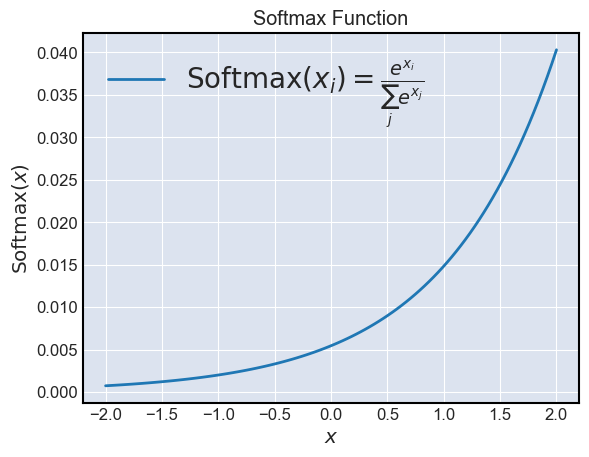

In [787]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()

x = np.linspace(-2, 2, 100)
y = softmax(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\text{Softmax}(x)$")
ax.set_title("Softmax Function")

ax.grid(True)
ax.legend(fontsize=20)

<br><hr><br>

## 5.6 - Swish

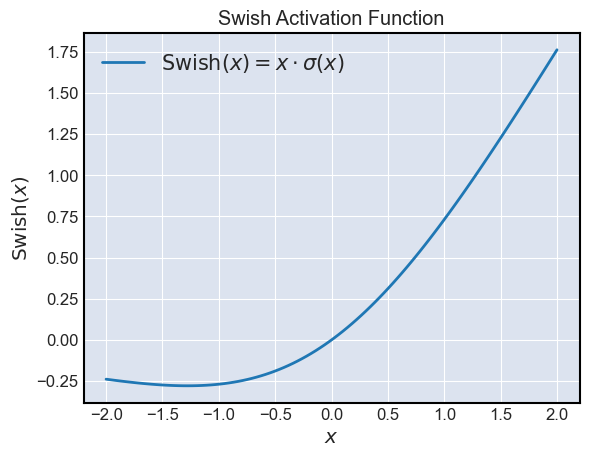

In [790]:
# Swish function
#  Usage in ML:
#  Developed by Google → Used in deep networks like EfficientNet
#  Works better than ReLU in some cases

def swish(x):
    return x * sigmoid(x)

y = swish(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\text{Swish}(x) = x \cdot \sigma(x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\text{Swish}(x)$")
ax.set_title("Swish Activation Function")

ax.grid(True)
ax.legend(fontsize=15)

<br><hr><br>

## 5.7 - ELU
* Best For: Deep learning
* Key Advantage: Helps avoid dead neurons; output can be negative, making it zero-centered
* Limitation: Computationally expensive for large datasets

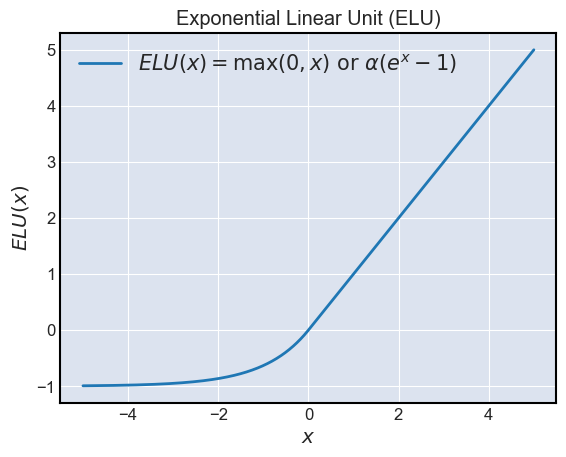

In [793]:
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Create a range of x values
x = np.linspace(-5, 5, 1000)

y = elu(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$ELU(x) = \max(0, x) \text{ or } \alpha (e^x - 1)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$ELU(x)$")
ax.set_title("Exponential Linear Unit (ELU)")

ax.grid(True)
ax.legend(fontsize=15)

<br><hr><br>

## 5.8 - GELU
* Best For: Transformer models (ex: BERT, GPT)
* Key Advantage: Smooth and differentiable; less prone to vanishing gradient
* Limitation: More complex than ReLU, leading to slower computations

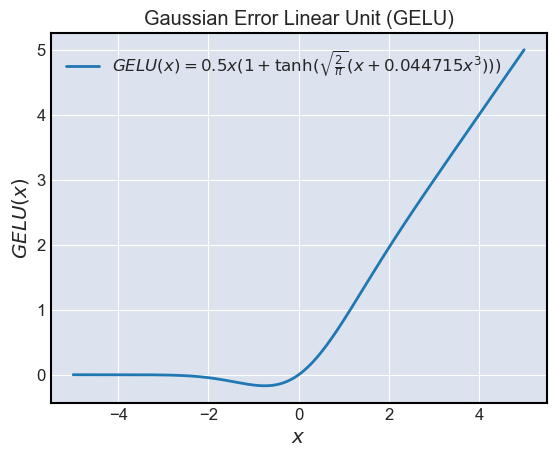

In [796]:
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

y = gelu(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$GELU(x) = 0.5x (1 + \tanh(\sqrt{\frac{2}{\pi}} (x + 0.044715 x^3)))$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$GELU(x)$")
ax.set_title("Gaussian Error Linear Unit (GELU)")

ax.grid(True)
ax.legend(fontsize=12)

<br><hr><br>

## 5.9 - SELU
* Best For: Self-normalizing networks
* Key Advantage: Self-normalizing, improving training stability
* Limitation: Sensitive to initialization and scaling of input data

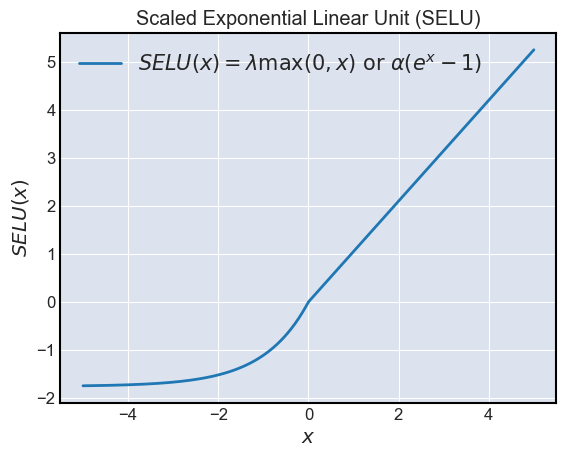

In [799]:
# λ and α are specific constants.

def selu(x, alpha=1.6733, lambda_=1.0507):
    return lambda_ * np.where(x > 0, x, alpha * (np.exp(x) - 1))

y = selu(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$SELU(x) = \lambda \max(0, x) \text{ or } \alpha (e^x - 1)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$SELU(x)$")
ax.set_title("Scaled Exponential Linear Unit (SELU)")

ax.grid(True)
ax.legend(fontsize=15)

<br><hr><br>

## 5.10 - Hard Sigmoid
* Best For: Situations where computational efficiency is critical
* Key Advantage: Faster computation compared to the standard Sigmoid function
* Limitation: Less smooth and more prone to approximation errors

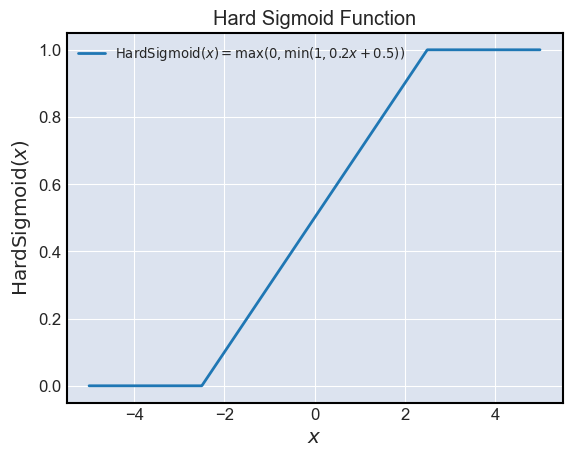

In [802]:
def hard_sigmoid(x):
    return np.clip(0.2 * x + 0.5, 0, 1)

y = hard_sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\text{HardSigmoid}(x) = \max(0, \min(1, 0.2x + 0.5))$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\text{HardSigmoid}(x)$")
ax.set_title("Hard Sigmoid Function")

ax.grid(True)
ax.legend(fontsize=9.5)

<br><hr><br>

## 5.11 - Softplus

* Best For: Replacement for ReLU (less sparse)
* Key Advantage: Smooth, differentiable function
* Limitation: Slower than ReLU and computationally expensive

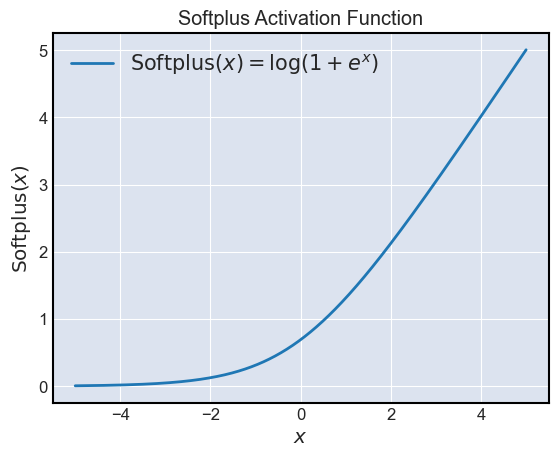

In [805]:
def softplus(x):
    return np.log(1 + np.exp(x))

y = softplus(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\text{Softplus}(x) = \log(1 + e^x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\text{Softplus}(x)$")
ax.set_title("Softplus Activation Function")

ax.grid(True)
ax.legend(fontsize=15)